In [17]:
import pandas as pd
from simpful import *

In [18]:
import pickle

# Load the pickled model
with open('saved_models/Fuzzy_GP/Best_fuzzy_GP_Old_Run.pkl', 'rb') as f:
    best_system = pickle.load(f)


In [19]:
# Define the path to the directory where the daily test sets are saved
daily_data_path = './daily_data/'

# Load the test sets
x_test = pd.read_csv(daily_data_path + 'X_test.csv')
y_test = pd.read_csv(daily_data_path + 'y_test.csv')

# Display the first few rows to verify the data
print("First few rows of x_test_daily:")
print(x_test_daily.head())

print("\nFirst few rows of y_test_daily:")
print(y_test_daily.head())


First few rows of x_test_daily:
       open        volume        sma_30        rsi        macd  dia_close  \
0  21221.13  12877.973419  21154.890736  52.934067   74.036837    305.109   
1  21474.14  11145.888527  21318.494153  50.874958   45.275991    305.109   
2  21024.85  17440.942683  21254.911306  42.329646  -67.645337    304.508   
3  20722.95  17658.660417  20892.814903  43.115578  -92.924226    299.975   
4  20253.50  18278.451859  20430.621500  41.216737 -154.618063    300.217   

   dia_volume  gld_close  gld_volume  spy_close  ...  \
0     15864.0     170.36     19632.0    380.404  ...   
1     15864.0     170.36     19632.0    380.404  ...   
2   1528402.0     169.97   5133105.0    379.877  ...   
3   2439691.0     169.56   2473429.0    372.174  ...   
4   1762014.0     169.54   4088532.0    371.042  ...   

   mobile_cellular_subscriptions_per_100_people  \
0                                    107.319451   
1                                    107.319451   
2              

In [20]:
best_system.get_rules()

['IF (spy_volume IS VERY_LOW) AND (durables_monthly IS VERY_LOW) AND (treasury_yield_daily IS VERY_LOW) AND (total_public_debt_gdp_value IS VERY_LOW) AND (spy_close IS VERY_HIGH) THEN (PricePrediction IS PricePrediction)',
 'IF (cpi_monthly IS VERY_HIGH) AND (gld_volume IS MEDIUM) OR (real_gdp_per_capita_quarterly IS VERY_HIGH) THEN (PricePrediction IS PricePrediction)',
 'IF (federal_funds_rate_daily IS HIGH) AND (nonfarm_payroll_monthly IS VERY_HIGH) AND (spy_volume IS LOW) AND (federal_funds_rate_daily IS LOW) OR (inflation_rate_value IS VERY_LOW) THEN (PricePrediction IS PricePrediction)',
 'IF (personal_remittances_received_prcnt_of_gdp IS VERY_LOW) AND (treasury_yield_daily IS MEDIUM) AND (inflation_rate_value IS VERY_HIGH) THEN (PricePrediction IS PricePrediction)']

In [21]:
predictions = best_system.predict_with_fis(data= x_test)

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming predictions is already computed and is a numpy array
predictions = best_system.predict_with_fis(data=x_test)


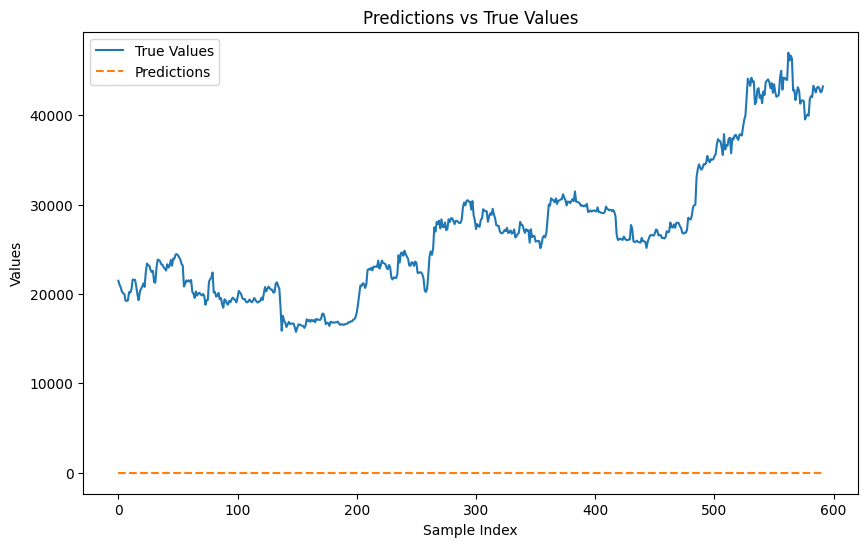

In [23]:
# Plot predictions and y_test
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.title('Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Its because the data is not scaled!!